# Mehrdimensionale Funktionen - Vorlesung

**Themenüberblick:**

- Wiederholung: Funktionsbegriff, eindimensionale Funktionen
- Skalarfelder: Graph, Konturlinien, lineares Skalarfeld
- Kurven: Geschwindigkeit, Beschleunigung, Tangente
- Oberflächen: Parametrisierung, Tangentialebene, Normalvektor, Kugel- und Zylinderkoordinaten
- Vektorfelder: Quell- und Wirbelfelder
- Operatoren: div, grad, rot

**zusätzliche Unterlagen:** `12_Vektoranalysis-scan.pdf`

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d.axes3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


## Wiederholung

Die Schreibweise für eine Funtion $f:\mathbb{R}^n \rightarrow \mathbb{R}^m: y = f(x)$ bedeutet, dass die Funktion $f$ jedem Element $x$ (Input, Stelle, Argument, unabhängige Größe(n)) aus $\mathbb{R}^n$ eindeutig ein Element $y = f(x)$ (Output, Bild, Wert, abhängige Größe(n)) aus $\mathbb{R}^m$ zuordnet. Die Gleichung $y = f(x)$ heißt die Funktionsgleichung von $f$. Oft wird auf einen Namen, wie etwa $f$ oben, und die Angabe der Input und Outputmengen verzichtet und nur $y(x)$ verwendet, zum Beispiel $y(x) = x^2 - 4$, oder noch kürzer $y = x^2 - 4$.

Der Graph einer eindimensionale Funktion $f:\mathbb{R} \rightarrow \mathbb{R}: y = f(x)$ zeigt jene Punkte $(x,y)$ in der Ebene $\mathbb{R}^2$ für die $y = f(x)$ gilt.

Eine lineare eindimensionale Funktion ist vom Typ $f(x) = kx$ für eine fixe Zahl $k$. Der Graph ist eine Gerade durch den Ursprung mit Steigung $k$.

Die Konturline oder Kontur(hyper)fläche einer Funktion $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$ zu einem Wert $c\in\mathbb{R}^m$ ist die Menge jener Inputs $x\in\mathbb{R}^n$, die durch die Funktion auf $c$ abgebildet werden und somit die Gleichung $f(x)=c$ erfüllen.

## Skalarfelder

Ein Skalarfeld auf $\mathbb{R}^n$ ist eine Funktion $f:\mathbb{R}^n \rightarrow \mathbb{R}$. Jedem Element, typischerweise als Punkt oder Ort interpretiert, in $\mathbb{R}^n$ wird also eine Zahl zugeordnet. Anders ausgedrückt wird jeder Punkt $x\in\mathbb{R}^n$ mit der Zahl $f(x)$ eindeutig bewertet.

**Beispiele:**

- Abstand eines Punktes der Ebene vom Ursprung: $r:\mathbb{R}^2 \rightarrow \mathbb{R}: r(x,y) = \sqrt{x^2 + y^2}.$
- Wir lösen die Zustandsgleichung $pV=nRT$ des idealen Gases nach $T$ auf und behandeln $p$ und $V$ als unabhängige Größen und $n$ als konstant: $T:\mathbb{R}^2 \rightarrow \mathbb{R}: T(p,V) = \frac{pV}{nR}.$
- Lineares Skalarfeld im Raum: $f:\mathbb{R}^3 \rightarrow \mathbb{R}: f(x,y,z) = 4x + 3y - 7z.$ Die Konturflächen sind parallele Ebenen im Raum.
- Allgemeines lineares Skalarfeld: $f:\mathbb{R}^n \rightarrow \mathbb{R}: f(x)=c^T x$ für einen fixen Koeffizientenvektor $c\in\mathbb{R}^n$.

**Grafische Darstellungsmöglichkeiten:**

- als Graph
- mit Konturlinien bzw. Kontur(hyper)flächen: Bei linearen Skalarfeldern sind das parallele Geraden bzw. (Hyper)ebenen.

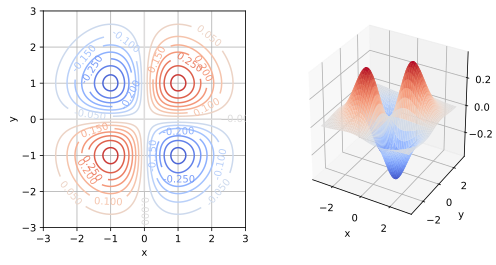

In [2]:
x = linspace(-3, 3, 200)
y = linspace(-3, 3, 200)
X, Y = meshgrid(x, y)
Z = X*Y*exp(-0.5*(X**2 + Y**2))

fig = figure(figsize=(8,4))
ax  = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0, cmap=cm.coolwarm)
ax.view_init(azim = -60, elev = 30)
xlabel('x')
ylabel('y')
subplot(1, 2, 1)
cs = contour(X, Y, Z, 15, cmap= 'coolwarm');
clabel(cs, inline=1)
xlabel('x')
ylabel('y')
grid(True)

## Kurven

Eine Kurve in $\mathbb{R}^n$ ist eine Funktion $f:\mathbb{R} \rightarrow \mathbb{R}^n$. Jedem Element, typischerweise als Zeitpunkt interpretiert, in $\mathbb{R}$ wird also eine Element in $\mathbb{R}^n$, typischerweise als Ort interpretiert, zugeordnet. 

**Beispiele:**

- Bewegung eines Massenpunktes: Kurve im Raum, auf einer Oberfläche etc.
- thermodynamischer Prozess: Kurve im Zustandsraum
- Gerade in der Ebene: Die aus der Schule bekannte Geradengleichung in Parameterform $\begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} 5 \\ 0 \end{pmatrix} + t \begin{pmatrix} 4 \\ -3 \end{pmatrix}$ entspricht der Funktion $f:\mathbb{R} \rightarrow \mathbb{R}^2: f(t) = \begin{pmatrix} x(t) \\ y(t) \end{pmatrix} = \begin{pmatrix} 5 + 4t \\ -3t \end{pmatrix}$
- Die nach $x$ parametrisierte Kurve entlang des Graphen der eindimensionalen Funktion $y(x) = x^2 - \sin(x)$ ist die Funktion $f:\mathbb{R} \rightarrow \mathbb{R}^2: f(x) = \begin{pmatrix} x \\ y(x) \end{pmatrix} = \begin{pmatrix} x \\ x^2 - \sin(x) \end{pmatrix}$
- Die nach $y$ parametrisierte Kurve entlang des Graphen der eindimensionalen Funktion $x(y) = \cos(y)$ ist die Funktion $f:\mathbb{R} \rightarrow \mathbb{R}^2: f(y) = \begin{pmatrix} x(y) \\ y \end{pmatrix} = \begin{pmatrix} \cos(y) \\ y \end{pmatrix}$
- Die Kreisbahn mit Radius $r$ und Kreisfrequenz $\omega$ ist die Funktion $f:\mathbb{R} \rightarrow \mathbb{R}^2: f(t) = \begin{pmatrix} x(t) \\ y(t) \end{pmatrix} = \begin{pmatrix} r\cos(\omega t) \\ r\sin(\omega t) \end{pmatrix}$
- Die Funktion $f:\mathbb{R} \rightarrow \mathbb{R}^3: f(t) = \begin{pmatrix} x(t) \\ y(t) \\ z(t) \end{pmatrix} = \begin{pmatrix} r\cos(\omega t) \\ r\sin(\omega t) \\ t \end{pmatrix}$ ist eine Schraubenlinie im Raum. 

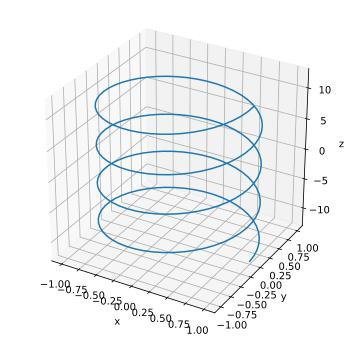

In [3]:
fig = figure(figsize=(6,6))
ax = fig.gca(projection='3d')
t = linspace(-4*pi, 4*pi, 200)
x = cos(t)
y = sin(t)
z = t
plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Wird die Inputvariable als Zeitpunkt interpretiert und die Outputvariablen als Ort, so ist die erste Ableitung der Kurve die Geschwindigkeit und die zweite Ableitung die Beschleunigung der von der Kurve beschriebenen Bewegung.

**Beispiel:** Kreisbahn mit Radius $r$ und Kreisfrequenz $\omega$: 
- Ort: $\begin{pmatrix} x(t) \\ y(t) \end{pmatrix} = \begin{pmatrix} r\cos(\omega t) \\ r\sin(\omega t) \end{pmatrix}$
- Geschwindigkeit = Tangentialvektor: $\begin{pmatrix} \dot{x}(t) \\ \dot{y}(t) \end{pmatrix} = \begin{pmatrix} -r\omega\sin(\omega t) \\ r\omega\cos(\omega t) \end{pmatrix}$
- Beschleunigung: $\begin{pmatrix} \ddot{x}(t) \\ \ddot{y}(t) \end{pmatrix} = \begin{pmatrix} -r\omega^2\cos(\omega t) \\ -r\omega^2\sin(\omega t) \end{pmatrix} = -\omega^2\begin{pmatrix} x(t) \\ y(t) \end{pmatrix}$
- Tangente bei $t$ in Parameterform mit Parameter $s$: $\begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} r\cos(\omega t) \\ r\sin(\omega t) \end{pmatrix} + s \begin{pmatrix} -r\omega\sin(\omega t) \\ r\omega\cos(\omega t) \end{pmatrix}$

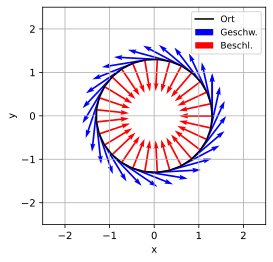

In [4]:
omega = 0.75
r = 1.3
t = linspace(0, 2*pi/omega, num=30)
x = r*cos(omega*t)
y = r*sin(omega*t)
xp = -r*omega*sin(omega*t)
yp =  r*omega*cos(omega*t)
xpp = -r*omega**2*cos(omega*t)
ypp = -r*omega**2*sin(omega*t)

figure(figsize=(4,4))
plot(x, y, color='black', label='Ort')
quiver(x, y, xp , yp , scale_units='xy', scale= 1, color='blue', label='Geschw.')
quiver(x, y, xpp, ypp, scale_units='xy', scale= 1, color='red', label='Beschl.')
legend(loc='best', fontsize=9)
xlabel('x')
ylabel('y')
xlim(-2.5, 2.5)
ylim(-2.5, 2.5)
grid(True)

## Oberflächen

Eine (parametrisierte) Oberfläche im $\mathbb{R}^3$ ist eine Funktion $f:\mathbb{R}^2 \rightarrow \mathbb{R}^3$. Jedem Parameterpaar $(u,v)$ in $\mathbb{R}^2$ wird ein Ort $f(u,v)$ im $\mathbb{R}^3$ zugeordnet.

**Beispiele:**

- Ebene im Raum: Die aus der Schule bekannte Ebenengleichung in Parameterform $X = \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} 3 \\ 8 \\ 4 \end{pmatrix} + s \begin{pmatrix} -1 \\ 4 \\ 5 \end{pmatrix} + t \begin{pmatrix} 2 \\ -1 \\ 7 \end{pmatrix}$ entspricht der Funktion $f:\mathbb{R}^2 \rightarrow \mathbb{R}^3: f(s, t) = \begin{pmatrix} x(s, t) \\ y(s, t) \\ z(s, t) \end{pmatrix} = \begin{pmatrix} 3 -s + 2t \\ 8 + 4s -t \\ 4 + 5s + 7t \end{pmatrix}$ mit den Parametern $s$ und $t$.
- Kugeloberfläche mit Radius $r$: Als Parameter werden meist die zwei Winkel $\vartheta$ und $\varphi$ der [Kugelkoordinaten](https://de.wikipedia.org/wiki/Kugelkoordinaten) verwendet: $f:\mathbb{R}^2 \rightarrow \mathbb{R}^3: f(\vartheta, \varphi) = \begin{pmatrix} x(\vartheta, \varphi) \\ y(\vartheta, \varphi) \\ z(\vartheta, \varphi) \end{pmatrix} = \begin{pmatrix} r\sin(\vartheta)\cos(\varphi) \\ r\sin(\vartheta)\sin(\varphi) \\ r\cos(\vartheta) \end{pmatrix}.$
- Zylindermantel mit Radius $r$:  Als Parameter werden meist der Winkel $\varphi$ und die Höhe $z$ der [Zylinderkoordinaten](https://de.wikipedia.org/wiki/Polarkoordinaten#Zylinderkoordinaten) verwendet: $f:\mathbb{R}^2 \rightarrow \mathbb{R}^3: f(\varphi, z) = \begin{pmatrix} x(\varphi, z) \\ y(\varphi, z) \\ z(\varphi, z) \end{pmatrix} = \begin{pmatrix} r\cos(\varphi) \\ r\sin(\varphi) \\ z \end{pmatrix}.$

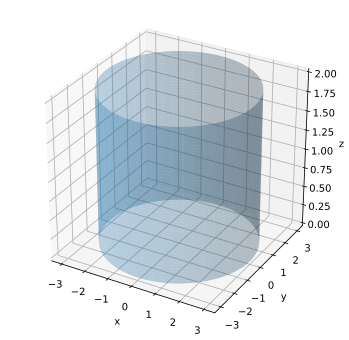

In [5]:
# Zylindermantel:
r = 3
phi = linspace(-pi, pi, 200)
z   = linspace(  0,  2, 200)
PHI, Z = meshgrid(phi, z)
X = r*cos(PHI)
Y = r*sin(PHI)

fig = figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Die Tangentialebene an einem Punkt $f(u_0,v_0)$ der Oberfläche wird von den zwei Tangentialvektoren $\frac{\partial f}{\partial u}(u_0,v_0)$ und $\frac{\partial f}{\partial v}(u_0,v_0)$ aufgespannt. Die Gleichung der Tangentialebene bei $f(u,v)$ lautet in Parameterform mit den Parametern $s$ und $t$ daher 

$$X = f(u_0,v_0) + s\frac{\partial f}{\partial u}(u_0,v_0) + t\frac{\partial f}{\partial v}(u_0,v_0),$$

und die Gleichung der Tangentialebene bei $f(u,v)$ in Normalvektorform lautet

$$\left( X - f(u_0,v_0) \right) ^T \left(\frac{\partial f}{\partial u}(u_0,v_0) \times \frac{\partial f}{\partial v}(u_0,v_0) \right) = 0.$$

**Beispiel:** 

$f:\mathbb{R}^2 \rightarrow \mathbb{R}^3: f(u, v) = \begin{pmatrix} x(u, v) \\ y(u, v) \\ z(u, v) \end{pmatrix} = \begin{pmatrix} v \\ u^2 + 4v \\ u - v \end{pmatrix}$, $(u_0,v_0)=(1,0)$, 
$f(1, 0) = \begin{pmatrix} 0 \\ 1 \\ 1 \end{pmatrix}$,
$\frac{\partial f}{\partial u}(1,0)= \begin{pmatrix} 0 \\ 2 \\  1 \end{pmatrix}$,
$\frac{\partial f}{\partial v}(1,0)= \begin{pmatrix} 1 \\ 4 \\ -1 \end{pmatrix}$

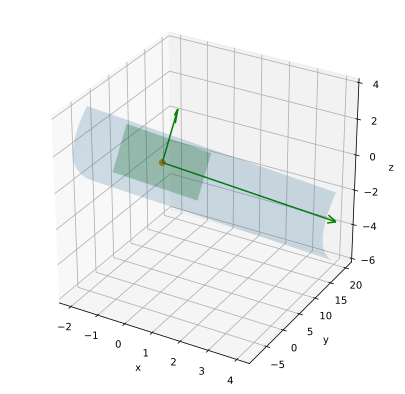

In [6]:
u = linspace(-2, 2, 100)
v = linspace(-2, 4, 100)
U, V = meshgrid(u, v)
X = V
Y = U**2 + 4*V
Z = U - V

fig = figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.2, linewidth=0)
ax.view_init(azim = -60, elev = 30)

s = linspace(-1, 1, 100)
t = linspace(-1, 1, 100)
S, T = meshgrid(s, t)
X = 0 + S*0 + T*1
Y = 1 + S*2 + T*4
Z = 1 + S*1 + T*(-1)
ax.plot([0], [1], [1], marker='o')
ax.quiver([0], [1], [1], [0], [2], [ 1], length=sqrt(5) , 
          pivot='tail', arrow_length_ratio=.2, color='green')
ax.quiver([0], [1], [1],[1], [4], [-1], length=sqrt(18), 
          pivot='tail', arrow_length_ratio=.05, color='green')
ax.plot_surface(X, Y, Z, alpha=0.3, color='green', linewidth=0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

## Vektorfelder

Ein Vektorfeld auf $\mathbb{R}^n$ ist eine Funktion $f:\mathbb{R}^n \rightarrow \mathbb{R}^n$. Jedem Element, typischerweise als Ort interpretiert, in $\mathbb{R}^n$ wird eine Element in $\mathbb{R}^n$, typischerweise als Vektorpfeil interpretiert, zugeordnet.

**Beispiele:**

- Drehfeld in der Ebene $f:\mathbb{R}^2 \rightarrow \mathbb{R}^2: f(x, y) =\begin{pmatrix} V_x (x,y) \\ V_y (x,y) \end{pmatrix}= \begin{pmatrix} -y \\ x  \end{pmatrix}$ ist ein Beispiel für ein Wirbelfeld.
- Das Vektorfeld in der Ebene $f:\mathbb{R}^2 \rightarrow \mathbb{R}^2: f(x, y) =\begin{pmatrix} V_x (x,y) \\ V_y (x,y) \end{pmatrix}= \begin{pmatrix} x \\ y  \end{pmatrix}$ ist ein Beispiel für ein Quellfeld.
- Schwerefeld der Erde: An jedem Ort zeigt die Schwerkraft zum Schwerpunkt der Erde: $f:\mathbb{R}^3 \rightarrow \mathbb{R}^3: f(x, y, z) =\begin{pmatrix} F_x (x,y,z) \\ F_y (x,y,z) \\ F_z (x,y,z) \end{pmatrix}= -G\frac{mM}{\sqrt{x^2 + y^2 + z^2}^3}\begin{pmatrix} x \\ y \\ z \end{pmatrix}.$

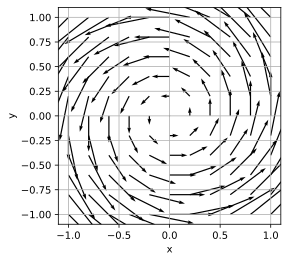

In [7]:
x = linspace(-1, 1, num=11)
y = linspace(-1, 1, num=11)
X, Y = meshgrid(x, y)
Vx = -Y
Vy =  X

figure(figsize=(4,4))
Q = quiver(X, Y, Vx, Vy, scale=5)  # für unskalierten Plot verwende units='xy', scale=1
xlabel('x')
ylabel('y')
grid(True)

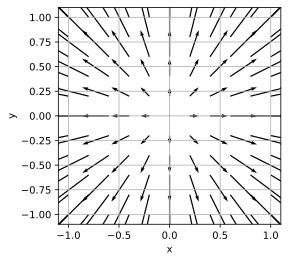

In [8]:
x = linspace(-1, 1, num=11)
y = linspace(-1, 1, num=11)
X, Y = meshgrid(x, y)
Vx = X
Vy = Y

figure(figsize=(4,4))
Q = quiver(X, Y, Vx, Vy, scale=5)  # für unskalierten Plot verwende units='xy', scale=1
xlabel('x')
ylabel('y')
grid(True)

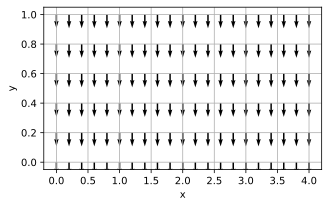

In [9]:
# Schwerefeld an der Erdoberfläche
m = 1  # kg
g = 10 # m/s^2
x = linspace(0, 4, num=21)
y = linspace(0, 1, num=6)
X, Y = meshgrid(x, y)
Fx = 0*ones(X.shape)
Fy = -m*g*ones(X.shape)

figure(figsize=(5,3))
Q = quiver(X, Y, Fx, Fy)  # für unskalierten Plot verwende units='xy', scale=1
xlabel('x')
ylabel('y')
grid(True)

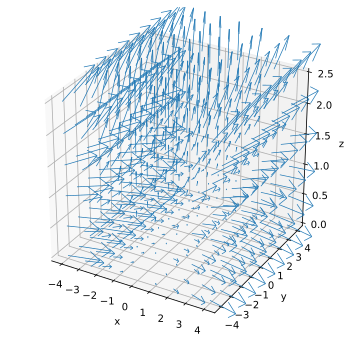

In [10]:
# 3D-Vektorfeld:
x = linspace(-4, 4, num=9)
y = linspace(-4, 4, num=9)
z = linspace(0, 2.5, num=6)
X, Y, Z = meshgrid(x, y, z)
Fx =  X**2
Fy = -X
Fz =  Z**2

fig = figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.quiver(X, Y, Z, Fx, Fy, Fz, pivot='tail', length=0.1, linewidth=0.7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

## Operatoren

**Nabla-Operator:**

- Der Nabla-Operator bzgl. zwei Inputvariablen $x$ und $y$ lautet $\nabla = \begin{pmatrix}\frac{\partial}{\partial x} \\ \frac{\partial}{\partial y}\end{pmatrix}$
- Der Nabla-Operator bzgl. $n$ Inputvariablen $x_1, x_2, \ldots,x_n$ lautet
$\nabla = \begin{pmatrix}\frac{\partial }{\partial x_1} \\ \frac{\partial }{\partial x_2} \\ \vdots \\ \frac{\partial }{\partial x_n} \end{pmatrix}$

**Gradient:** Vektor aller partiellen Ableitungen, grad oder $\nabla$ geschrieben

Der Gradient macht aus einem Skalarfeld ein Vektorfeld. 
Der Gradient $\nabla f(x,y)$ zeigt in die **Richtung des stärksten Anstiegs** von $f$ bei $(x,y)$ und ist daher rechtwinklig auf die Konturlinie von $f$ durch $(x,y)$. Die Länge von $\nabla f(x,y)$ ist ein Maß für die Stärke dieses Anstiegs. 
Speziell: Falls $f$ linear ist, d. h. $f(x,y) = ax + by$ für Koeffizienten $a$ und $b$, dann ist $\nabla f(x,y) = \begin{pmatrix}\frac{\partial}{\partial x} \\ \frac{\partial}{\partial y}\end{pmatrix} [ax + by] = \begin{pmatrix} a \\ b \end{pmatrix}$ der Koeffizientenvektor von $f$ und Normalvektor auf die parallelen Konturgeraden von $f$.

*Beispiel:* 

$$\begin{align}
f: \mathbb{R}^2 \rightarrow \mathbb{R}: & f(x,y) = 3x^2 y \\
\text{grad}(f): \mathbb{R}^2 \rightarrow \mathbb{R}^2: & \text{ grad}(f)(x,y) = \nabla f(x,y) = 
\begin{pmatrix}\frac{\partial}{\partial x} \\ \frac{\partial}{\partial y}\end{pmatrix}3x^2 y =
\begin{pmatrix} 6xy \\ 3x^2 \end{pmatrix}
\end{align}$$

**Divergenz:** Summe aller partiellen Ableitungen, div oder $\nabla\cdot$ geschrieben

Die Divergenz macht aus einem Vektorfeld ein Skalarfeld. Die Divergenz misst die **Quelldichte** des Vektorfeldes.

*Beispiele:* 

$$\begin{align}
f: \mathbb{R}^2 \rightarrow \mathbb{R}^2: & \,f(x,y) = \begin{pmatrix} -xy \\ y^2 \end{pmatrix} \\
\text{div}(f): \mathbb{R}^2 \rightarrow \mathbb{R}: & \,\text{div}(f) = \nabla\cdot f(x,y) = 
\begin{pmatrix}\frac{\partial}{\partial x} \\ \frac{\partial}{\partial y}\end{pmatrix} \cdot 
\begin{pmatrix} -xy \\ y^2 \end{pmatrix} = -y + 2y = y
\end{align}$$

$$\begin{align}
f: \mathbb{R}^2 \rightarrow \mathbb{R}^2: & \,f(x,y) = \begin{pmatrix} -y \\ x \end{pmatrix} \\
\text{div}(f): \mathbb{R}^2 \rightarrow \mathbb{R}: & \,\text{div}(f) = \nabla\cdot f(x,y) = 
\begin{pmatrix}\frac{\partial}{\partial x} \\ \frac{\partial}{\partial y}\end{pmatrix} \cdot 
\begin{pmatrix} -y \\ x \end{pmatrix} = 0 + 0 = 0
\end{align}$$

$$\begin{align}
f: \mathbb{R}^2 \rightarrow \mathbb{R}^2: & \,f(x,y) = \begin{pmatrix} x \\ y \end{pmatrix} \\
\text{div}(f): \mathbb{R}^2 \rightarrow \mathbb{R}: & \,\text{div}(f) = \nabla\cdot f(x,y) = 
\begin{pmatrix}\frac{\partial}{\partial x} \\ \frac{\partial}{\partial y} \end{pmatrix} \cdot 
\begin{pmatrix} x \\ y \end{pmatrix} = 1 + 1 = 2
\end{align}$$

**Rotation:** "Kreuzprodukt" der partiellen Ableitungen, rot oder $\nabla\times$ geschrieben

Die Rotation macht aus einem zweidimensionalen Vektorfeld ein Skalarfeld und aus einem dreidimensionalen Vektorfeld wieder ein Vektorfeld. Die Rotation misst die **Wirbeldichte** des Vektorfeldes.

*Beispiele:*

$$\begin{align}
f: \mathbb{R}^2 \rightarrow \mathbb{R}^2: & \,f(x,y) = \begin{pmatrix} -y \\ x \end{pmatrix} \\
\text{rot}(f): \mathbb{R}^2 \rightarrow \mathbb{R}: & \,\text{rot}(f) = \nabla\times f(x,y) = 
\begin{pmatrix}\frac{\partial}{\partial x} \\ \frac{\partial}{\partial y}\end{pmatrix} \times 
\begin{pmatrix} -y \\ x \end{pmatrix} = 1 + 1 = 2
\end{align}$$

$$\begin{align}
f: \mathbb{R}^2 \rightarrow \mathbb{R}^2: & \,f(x,y) = \begin{pmatrix} x \\ y \end{pmatrix} \\
\text{rot}(f): \mathbb{R}^2 \rightarrow \mathbb{R}: & \,\text{rot}(f) = \nabla\times f(x,y) = 
\begin{pmatrix}\frac{\partial}{\partial x} \\ \frac{\partial}{\partial y}\end{pmatrix} \times 
\begin{pmatrix} x \\ y \end{pmatrix} = 0 + 0 = 0
\end{align}$$

$$\begin{align}
f: \mathbb{R}^3 \rightarrow \mathbb{R}^3: & \,f(x,y,z) = \begin{pmatrix} -xy \\ z \\ z + x \end{pmatrix} \\
\text{rot}(f): \mathbb{R}^3 \rightarrow \mathbb{R}^3: & \,\text{rot}(f) = \nabla\times f(x,y,z) = 
\begin{pmatrix}\frac{\partial}{\partial x} \\ \frac{\partial}{\partial y} \\ \frac{\partial}{\partial z} \end{pmatrix} \times 
\begin{pmatrix} -xy \\ z \\ z + x \end{pmatrix} = 
\begin{pmatrix} -1 \\ -1 \\ x \end{pmatrix}
\end{align}$$

**Ausblick:** Die [Maxwell-Gleichungen](https://de.wikipedia.org/wiki/Maxwell-Gleichungen) beschreiben elektrische und magnetische Felder. Sie werden meist mit Hilfe der Operatoren div und rot geschrieben:

$$\begin{align}
\text{div}(\vec{E}) &= \frac{\rho}{\varepsilon_0} \\
\text{div}(\vec{B}) &= 0 \\
\text{rot}(\vec{E}) &= -\frac{\partial \vec{B}}{\partial t} \\
\text{rot}(\vec{B}) &= \mu_0\,\vec{j} + \mu_0\varepsilon_0\frac{\partial \vec{E}}{\partial t}
\end{align}$$